# Milestone 1 : Prototypes to integrate orbits without functions.


In [1]:
import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any

N = 200000
dt = 0.001

U = zeros((N,4))
F = zeros((N,4))

U[0,:] = (1,0,0,1)

### 1. Write a script to integrate Kepler orbits with an EULER method  
U(n+1) = U(n) + dt*U(n)



In [ ]:

for n in range(0,N-1):
    norm = (U[n,0]**2 + U[n,1]**2)**0.5
    F[n,:] = (U[n,2], U[n,3], -U[n,0]/norm, -U[n,1]/norm)
    U[n+1,:] = U[n,:] + dt*F[n,:]

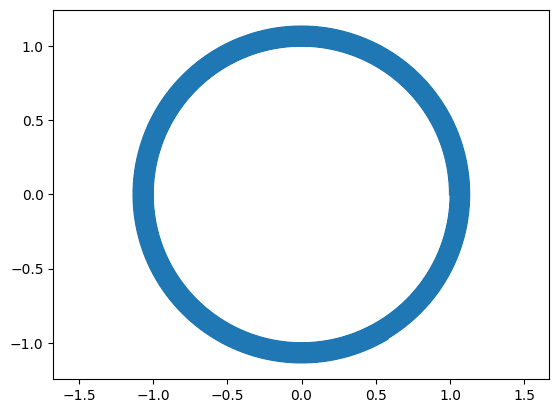

In [5]:
plt.axis("equal")
plt.plot(U[:,0], U[:,1])
plt.show()

### 2. Write a script to integrate Kepler orbits with a CRANK-NICOLSON method.

U(n+1) = U(n) + (dt/2)* (F(U(n)) + F(U(n)))



In [6]:
for n in range(0,N-1):

    norm = (U[n,0]**2 + U[n,1]**2)**0.5                            #initial Euler
    F[n,:] = (U[n,2], U[n,3], -U[n,0]/norm, -U[n,1]/norm)
    U[n+1,:] = U[n,:] + dt*F[n,:]               

    diff = 1
    num_iterations = 1


    while (abs(diff)) > 1e-6  and num_iterations<50:
            
        value_anterior = U[n+1,:].copy()
        norm = (value_anterior[0]**2 + value_anterior[1]**2)**0.5   
        F_anterior = (value_anterior[2], value_anterior[3], -value_anterior[0]/norm, -value_anterior[1]/norm)

        norm = (U[n,0]**2 + U[n,1]**2)**0.5                            #initial Euler
        F[n,:] = (U[n,2], U[n,3], -U[n,0]/norm, -U[n,1]/norm)
        U[n+1,:] = U[n,:] + (dt/2)*(F[n,:] + F_anterior)
        
        diff = linalg.norm(U[n+1,:] - value_anterior)                     #difference between iterations
        num_iterations = num_iterations + 1


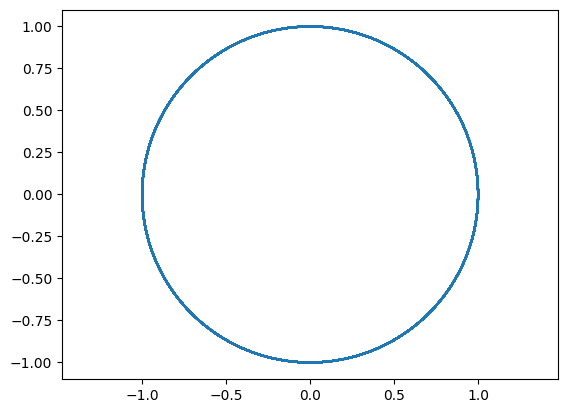

In [7]:
plt.axis("equal")
plt.plot(U[:,0], U[:,1])
plt.show()

### 3. Write a script to integrate Kepler orbits with a RUNGE-KUTTA fourth order.

U(n+1) = U(n) + (dt/6)\*( k_1 + 2*k_2 + 2*k_3 + k_4) 

- k_1 = F(n) 

- k_2 = F(U(n) + (dt/2)*k_1)

- k_3 = F(U(n) + (dt/2)*k_2)

- k_4 = F(U(n) + dt*k_3)


In [8]:

V = zeros((N,4))

for n in range(0,N-1):
    
    norm = (U[n,0]**2 + U[n,1]**2)**0.5
    F[n,:] = (U[n,2], U[n,3], -U[n,0]/norm, -U[n,1]/norm)

    k_1 = F[n,:]
    
    V[n,:] = U[n,:] + (dt/2)*k_1
    norm = (V[n,0]**2 + V[n,1]**2)**0.5
    F[n,:] = (V[n,2], V[n,3], -U[n,0]/norm, -U[n,1]/norm)

    k_2 = F[n,:]

    V[n,:] = U[n,:] + (dt/2)*k_2
    norm = (V[n,0]**2 + V[n,1]**2)**0.5
    F[n,:] = (V[n,2], V[n,3], -U[n,0]/norm, -U[n,1]/norm)

    k_3 = F[n,:]

    V[n,:] = U[n,:] + (dt)*k_3
    norm = (V[n,0]**2 + V[n,1]**2)**0.5
    F[n,:] = (V[n,2], V[n,3], -U[n,0]/norm, -U[n,1]/norm)
    
    k_4 = F[n,:]

    U[n+1,:] = U[n,:] + dt*F[n,:]

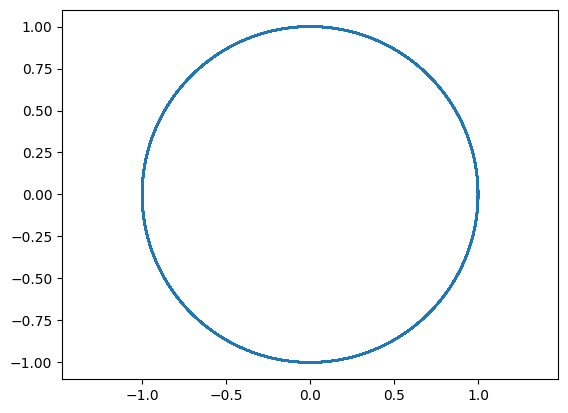

In [9]:
plt.axis("equal")
plt.plot(U[:,0], U[:,1])
plt.show()